# 處理 outliers
* 新增欄位註記
* outliers 或 NA 填補
    1. 平均數 (mean)
    2. 中位數 (median, or Q50)
    3. 最大/最小值 (max/min, Q100, Q0)
    4. 分位數 (quantile)

# [作業目標]
- 仿造範例的資料操作, 試著進行指定的離群值處理

# [作業重點]
- 計算 AMT_ANNUITY 的分位點 (q0 - q100) (Hint : np.percentile, In[3])
- 將 AMT_ANNUITY 的 NaN 用中位數取代 (Hint : q50, In[4])
- 將 AMT_ANNUITY 數值轉換到 -1 ~ 1 之間 (Hint : 參考範例, In[5])
- 將 AMT_GOOD_PRICE 的 NaN 用眾數取代 (In[6])

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# 設定 data_path
dir_data = 'C:/Users/user/Desktop/ML marathon/data/Home Credit Default Risk/'

In [2]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: C:/Users/user/Desktop/ML marathon/data/Home Credit Default Risk/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 1. 列出 AMT_ANNUITY 的 q0 - q100



In [3]:
app_train['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [4]:
app_train['AMT_ANNUITY'].isnull().value_counts() # 確認有一些 NA 值

False    307499
True         12
Name: AMT_ANNUITY, dtype: int64

In [5]:
"""
YOUR CODE HERE
"""
# 1: 計算 AMT_ANNUITY 的 q0 - q100
q_all = [np.percentile(app_train[~app_train['AMT_ANNUITY'].isnull()]['AMT_ANNUITY'], q = i) for i in range(101)]

ans1 = pd.DataFrame({'q': list(range(101)),
                     'value': q_all})

In [6]:
ans1.head()

,q,value
0,0,1615.50
1,1,6182.91
2,2,6750.00
3,3,7875.00
4,4,8703.00


In [7]:
ans1.tail()

,q,value
96,96,55624.5
97,97,58482.0
98,98,62964.0
99,99,70006.5
100,100,258025.5


#### 跑的好像有點久，應該可以有更好的方法。

## 2.1 將 AMT_ANNUITY 中的 NAs 暫時以中位數填補


#### 三種作法

In [9]:
ans1.loc[50, 'value'] 

24903.0

In [10]:
app_train[~app_train['AMT_ANNUITY'].isnull()]['AMT_ANNUITY'].quantile(0.5)

24903.0

In [11]:
app_train['AMT_ANNUITY'].median()

24903.0

In [12]:
# 2.1 將 NAs 以 q50 填補
print("Before replace NAs, numbers of row that AMT_ANNUITY is NAs: %i" % sum(app_train['AMT_ANNUITY'].isnull()))

"""
Your Code Here
"""
#q_50 = app_train[~app_train['AMT_ANNUITY'].isnull()]['AMT_ANNUITY'].quantile(0.5)
q_50 = ans1.loc[50, 'value'] 
app_train.loc[app_train['AMT_ANNUITY'].isnull(),'AMT_ANNUITY'] = q_50

print("After replace NAs, numbers of row that AMT_ANNUITY is NAs: %i" % sum(app_train['AMT_ANNUITY'].isnull()))

Before replace NAs, numbers of row that AMT_ANNUITY is NAs: 12
After replace NAs, numbers of row that AMT_ANNUITY is NAs: 0


In [13]:
# 看看填補後的資料
app_train['AMT_ANNUITY'].describe()

count    307511.000000
mean      27108.487841
std       14493.461065
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

## 2.2 將 AMT_ANNUITY 的數值標準化至 -1 ~ 1 間


### Hints: Normalize function (to -1 ~ 1)
$ y = 2*(\frac{x - min(x)}{max(x) - min(x)} - 0.5) $

== Original data range ==
count    307511.000000
mean      27108.487841
std       14493.461065
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64


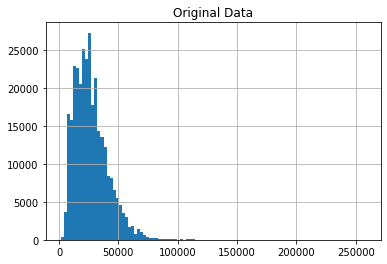

== Normalized data range ==
count    307511.000000
mean         -0.801154
std           0.113049
min          -1.000000
25%          -0.883714
50%          -0.818357
75%          -0.742752
max           1.000000
Name: AMT_ANNUITY_NORMALIZED, dtype: float64


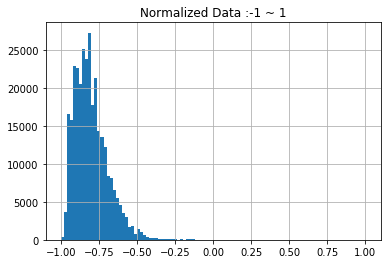

In [14]:
# 2.2 Normalize values to -1 to 1
print("== Original data range ==")
print(app_train['AMT_ANNUITY'].describe())
app_train['AMT_ANNUITY'].hist(bins = 100)
plt.title('Original Data')
plt.show()

def normalize_value(x):
    """
    Your Code Here, compelete this function
    """
    x = 2 * ((x - min(x)) / (max(x) - min(x)) - 0.5)
        
    return x

app_train['AMT_ANNUITY_NORMALIZED'] = normalize_value(app_train['AMT_ANNUITY'])

print("== Normalized data range ==")
print(app_train['AMT_ANNUITY_NORMALIZED'].describe()) # 調整過後最大值為1，最小值為-1
app_train['AMT_ANNUITY_NORMALIZED'].hist(bins = 100)
plt.title('Normalized Data :-1 ~ 1')
plt.show()

## 3. 將 AMT_GOODS_PRICE 的 NAs 以眾數填補

In [15]:
from scipy.stats import mode # 統計套件
mode_get = mode(app_train[~app_train['AMT_GOODS_PRICE'].isnull()]['AMT_GOODS_PRICE'])
print(mode_get)

ModeResult(mode=array([450000.]), count=array([26022]))


In [16]:
# 這樣感覺更方便
app_train['AMT_GOODS_PRICE'].value_counts().index[0]

450000.0

In [17]:
# 3
print("Before replace NAs, numbers of row that AMT_GOODS_PRICE is NAs: %i" % sum(app_train['AMT_GOODS_PRICE'].isnull()))

# 列出重複最多的數值
"""
Your Code Here
"""
# 計算眾數
from collections import Counter

mode_counter = Counter()
mode_counter.update(app_train[~app_train['AMT_GOODS_PRICE'].isnull()]['AMT_GOODS_PRICE'])
res = sorted(mode_counter.items(), key = lambda x: x[1], reverse = True)

value_most = res[0][0]
print("mode : {:,.0f}".format(value_most))

mode_goods_price = list(app_train['AMT_GOODS_PRICE'].value_counts().index)
app_train.loc[app_train['AMT_GOODS_PRICE'].isnull(), 'AMT_GOODS_PRICE'] = mode_goods_price[0]

print("After replace NAs, numbers of row that AMT_GOODS_PRICE is NAs: %i" % sum(app_train['AMT_GOODS_PRICE'].isnull()))

Before replace NAs, numbers of row that AMT_GOODS_PRICE is NAs: 278
mode : 450,000
After replace NAs, numbers of row that AMT_GOODS_PRICE is NAs: 0
